train acc, test acc | 0.09871666666666666, 0.098
train acc, test acc | 0.7867333333333333, 0.7926
train acc, test acc | 0.8784333333333333, 0.8837
train acc, test acc | 0.8995333333333333, 0.9035
train acc, test acc | 0.90775, 0.9113
train acc, test acc | 0.9137833333333333, 0.9179
train acc, test acc | 0.91925, 0.9225
train acc, test acc | 0.9236333333333333, 0.9261
train acc, test acc | 0.9260166666666667, 0.9276
train acc, test acc | 0.9301666666666667, 0.9305
train acc, test acc | 0.9332833333333334, 0.9332
train acc, test acc | 0.9350833333333334, 0.9358
train acc, test acc | 0.9386166666666667, 0.9391
train acc, test acc | 0.9404833333333333, 0.9396
train acc, test acc | 0.9422666666666667, 0.9428
train acc, test acc | 0.9442166666666667, 0.9426
train acc, test acc | 0.9458666666666666, 0.9448


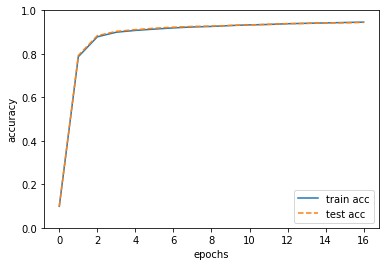

In [3]:
#mnistデータをニューラルネットワークの勾配降下法で学習する

%matplotlib inline
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

#スクリプトで準備しているニューラルネットのクラスを呼び出す（隠れ層ー出力層）
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

#バッチの試行回数
iters_num = 10000
#訓練データの総数
train_size = x_train.shape[0] #60,000
#バッチサイズ
batch_size = 100
#学習率の設定
learning_rate = 0.1

#損失関数値のレコード
train_loss_list = []
#訓練精度のレコード
train_acc_list = []
#テスト精度のレコード
test_acc_list = []

#１エポックの訓練回数(ミニバッチ処理回数)
iter_per_epoch = max(train_size / batch_size, 1)

#ミニバッチによる学習を繰り返し試行する
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算（numerical_gradient：数値微分による勾配、gradient：解析微分による勾配）
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新（それぞれの重みとバイアスで実施）
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
